# 전국폐기물 발생 및 처리현황(2014년~2021년까지)
- 발생년도, 시도, 시군구, 폐기물 대분류, 폐기물 중분류, 폐기물 소분류, 전체발생량, 총계_재활용, 총계_소각, 총계_매립, 총계_기타
- 시군구별 페기물 종류별 발생량을 예측하는 모델을 만들어 봅니다

In [1]:
# 데이터 분석 패키지
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 모델 및 평가 패키지
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve


In [2]:
# 데이터 불러오기
data = pd.read_csv('data/combined_data.csv')
data.head()

,발생년도,시도,시군구,폐기물 대분류,폐기물 중분류,폐기물 소분류,전체발생량,총계_재활용,총계_소각,총계_매립,총계_기타
0,2014,전국,합계,NaN,NaN,NaN,42355.2,24552.9,11530.6,6271.7,0.0
1,2014,서울,종로구,NaN,NaN,NaN,290.9,170.4,88.1,32.4,0.0
2,2014,서울,중구,NaN,NaN,NaN,410.6,258.6,132.6,19.4,0.0
3,2014,서울,용산구,NaN,NaN,NaN,245.4,158.1,79.1,8.2,0.0
4,2014,서울,성동구,NaN,NaN,NaN,228.6,142.6,65.1,20.9,0.0


In [3]:
# 데이터의 통계 정보 확인
data.describe()

,발생년도,전체발생량,총계_재활용,총계_소각,총계_매립,총계_기타
count,32403.000000,32403.000000,32403.000000,32403.000000,32403.000000,32403.000000
mean,2019.857421,54.758106,26.890739,18.494886,9.171287,0.199981
std,1.124376,811.147867,457.196534,279.030544,133.651107,3.902260
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,1.100000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,11.100000,2.400000,1.100000,0.450000,0.000000
max,2021.000000,47403.800000,27774.800000,13852.600000,6782.800000,295.600000


In [4]:
# 데이터의 결측치 확인
data.isnull().sum()

# 데이터의 타입 확인
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32403 entries, 0 to 32402
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   발생년도     32403 non-null  int64  
 1   시도       32403 non-null  object 
 2   시군구      32403 non-null  object 
 3   폐기물 대분류  31248 non-null  object 
 4   폐기물 중분류  31248 non-null  object 
 5   폐기물 소분류  31248 non-null  object 
 6   전체발생량    32403 non-null  float64
 7   총계_재활용   32403 non-null  float64
 8   총계_소각    32403 non-null  float64
 9   총계_매립    32403 non-null  float64
 10  총계_기타    32403 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 2.7+ MB


In [6]:
# matplotlib 한글 폰트 오류 문제 해결, 맥,리눅스,윈도우 별로 폰트 설정
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    # path = "/usr/share/fonts/NanumFont/NanumGothic.ttf"
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('알수없는 시스템. 미적용')



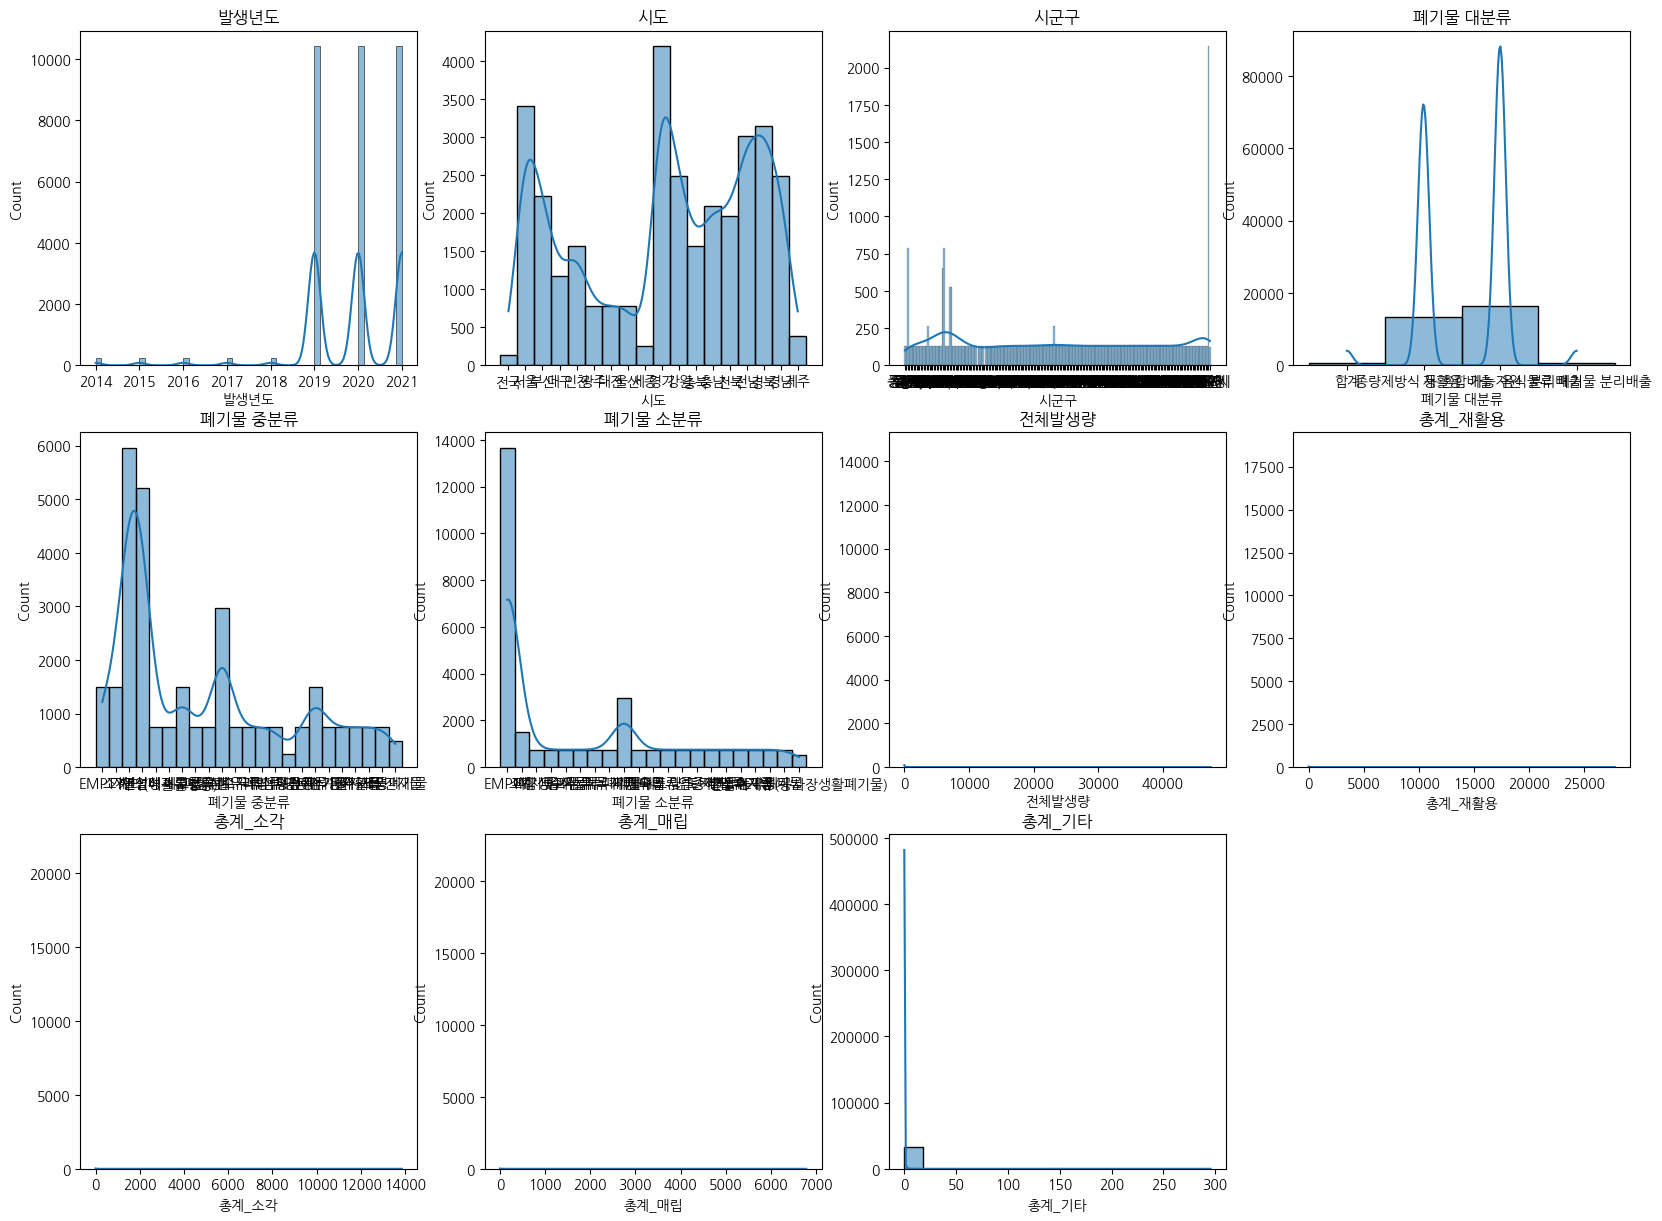

In [7]:
# 데이터의 분포 확인
plt.figure(figsize=(20, 20))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.show()

In [ ]:
# 연도별 전체 폐기물 발생량 추이 분석
yearly_data = data.groupby('발생년도')['전체발생량'].sum().reset_index()

# 시각화: 연도별 전체 폐기물 발생량 추이
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['발생년도'], yearly_data['전체발생량'], marker='o')
plt.title('연도별 전체 폐기물 발생량 추이')
plt.xlabel('발생년도')
plt.ylabel('전체발생량 (천 톤)')
plt.grid(True)
plt.show()